# Vanilla GAN implementation from scratch with Numpy

This is a simple implementation of a Generative Adversarial Network
from Ian Goodfelow's paper (https://arxiv.org/pdf/1406.2661.pdf). The Generator and Discriminator are described by multilayer perceptrons.

## 1. Imports

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 2. Data Preparation

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("y_train.shape",y_train.shape)
print("x_train.shape",x_train.shape)
print("y_test.shape",y_test.shape)
print("x_test.shape",x_test.shape)

y_train.shape (60000,)
x_train.shape (60000, 28, 28)
y_test.shape (10000,)
x_test.shape (10000, 28, 28)


In [3]:
x_train = (x_train.astype(np.float32) - 127.5) / 127.5 # new range: [-1,1]

In [4]:
idx = np.random.permutation(len(x_train))
x_train, y_train = x_train[idx], y_train[idx]

## 3. Load and train model

In [5]:
%run model.py

Epoch:0|G loss:0.7815|D loss:1.2111|D(G(z))avg:0.4583|D(x)avg:0.5504|LR:0.001000


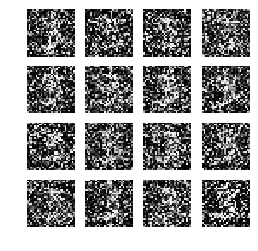

Epoch:5|G loss:0.7859|D loss:1.1960|D(G(z))avg:0.4559|D(x)avg:0.5561|LR:0.000990


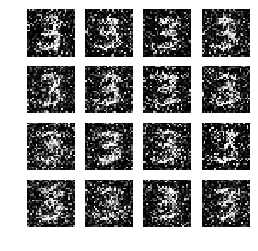

Epoch:10|G loss:0.7271|D loss:1.3067|D(G(z))avg:0.4835|D(x)avg:0.5244|LR:0.000956


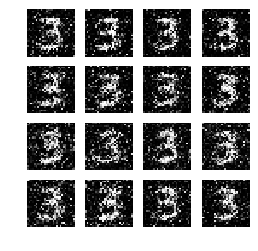

Epoch:15|G loss:0.7111|D loss:1.3481|D(G(z))avg:0.4912|D(x)avg:0.5108|LR:0.000901


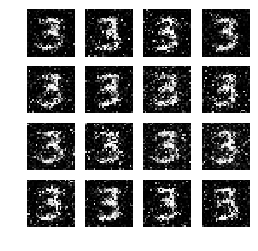

Epoch:20|G loss:0.7058|D loss:1.3615|D(G(z))avg:0.4938|D(x)avg:0.5064|LR:0.000828


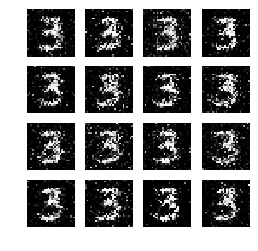

Epoch:25|G loss:0.7041|D loss:1.3661|D(G(z))avg:0.4946|D(x)avg:0.5048|LR:0.000743


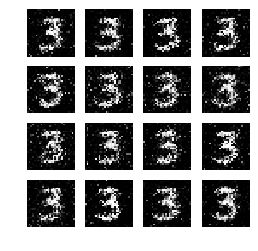

Epoch:30|G loss:0.7019|D loss:1.3695|D(G(z))avg:0.4957|D(x)avg:0.5042|LR:0.000650


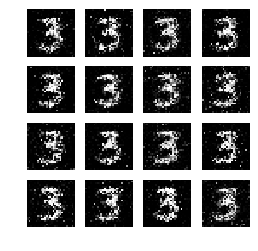

Epoch:35|G loss:0.6998|D loss:1.3726|D(G(z))avg:0.4967|D(x)avg:0.5036|LR:0.000555


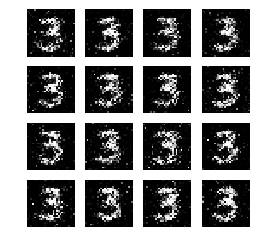

Epoch:40|G loss:0.7004|D loss:1.3730|D(G(z))avg:0.4964|D(x)avg:0.5031|LR:0.000463


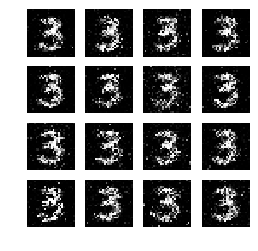

Epoch:45|G loss:0.6986|D loss:1.3759|D(G(z))avg:0.4973|D(x)avg:0.5026|LR:0.000377


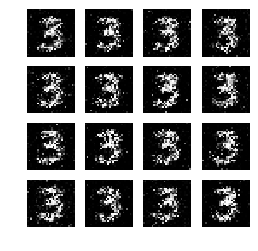

Epoch:50|G loss:0.6981|D loss:1.3771|D(G(z))avg:0.4975|D(x)avg:0.5022|LR:0.000300


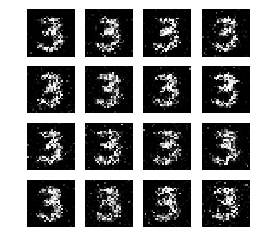

Epoch:55|G loss:0.6987|D loss:1.3773|D(G(z))avg:0.4972|D(x)avg:0.5018|LR:0.000233


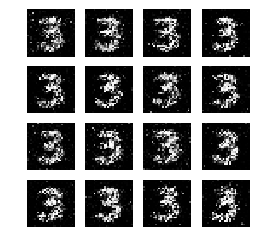

Epoch:60|G loss:0.6965|D loss:1.3800|D(G(z))avg:0.4983|D(x)avg:0.5015|LR:0.000176


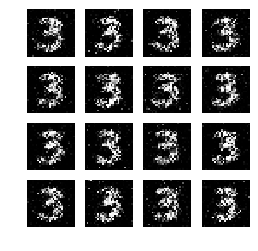

Epoch:65|G loss:0.6978|D loss:1.3792|D(G(z))avg:0.4977|D(x)avg:0.5013|LR:0.000130


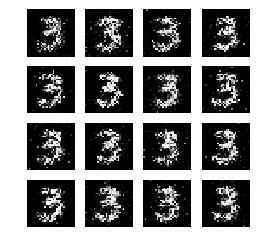

Epoch:70|G loss:0.6956|D loss:1.3815|D(G(z))avg:0.4988|D(x)avg:0.5012|LR:0.000094


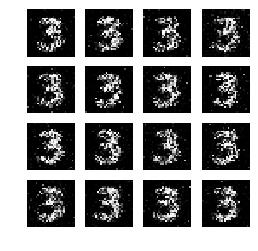

Epoch:75|G loss:0.6967|D loss:1.3807|D(G(z))avg:0.4983|D(x)avg:0.5011|LR:0.000067


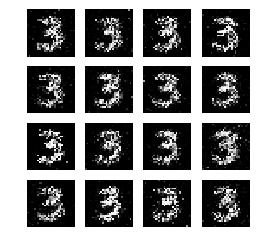

Epoch:80|G loss:0.6958|D loss:1.3817|D(G(z))avg:0.4987|D(x)avg:0.5010|LR:0.000046


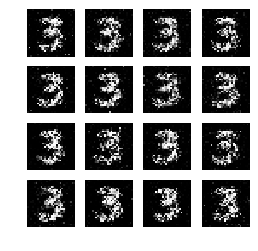

Epoch:85|G loss:0.6964|D loss:1.3812|D(G(z))avg:0.4984|D(x)avg:0.5010|LR:0.000031


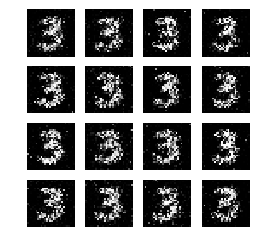

Epoch:90|G loss:0.6961|D loss:1.3816|D(G(z))avg:0.4986|D(x)avg:0.5009|LR:0.000020


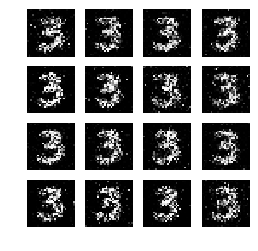

Epoch:95|G loss:0.6964|D loss:1.3813|D(G(z))avg:0.4984|D(x)avg:0.5009|LR:0.000013


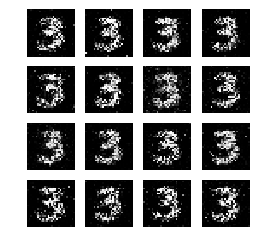

In [6]:
numbers = [3]

model = GAN(numbers, learning_rate=1e-3, decay_rate=1e-3, epochs=100, create_gif=True)
J_Ds, J_Gs = model.train(x_train, y_train)

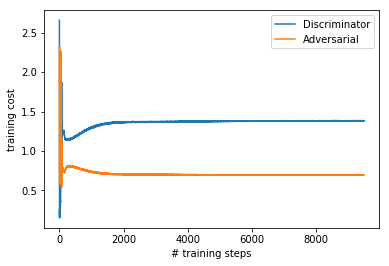

In [7]:
plt.plot([i for i in range(len(J_Ds))], J_Ds)
plt.plot([i for i in range(len(J_Gs))], J_Gs)

plt.xlabel("# training steps")
plt.ylabel("training cost")
plt.legend(['Discriminator', 'Adversarial'])
plt.show()